In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import keras
from keras.models import Sequential, load_model
from plot_conf import *
import shelve
import h5py

Using Theano backend.
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
basepath = './train_hist/2017-07-21/lowE/'
plot_data = np.load(os.path.join(basepath, 'test_res.npy'))
xbins = np.linspace(2,4,30)
ybins = np.linspace(2,4,30)

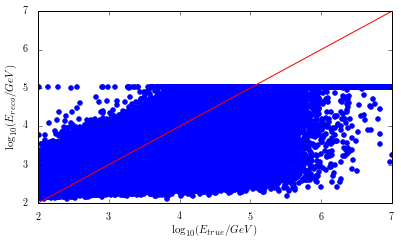

In [10]:
fig, ax= newfig(0.9)
ax.scatter(plot_data[1], plot_data[0], color='blue')
ax.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
ax.set_xlim(2,7)
ax.set_ylim(2,7)
#plt.savefig('latest_network.png')
plt.show()

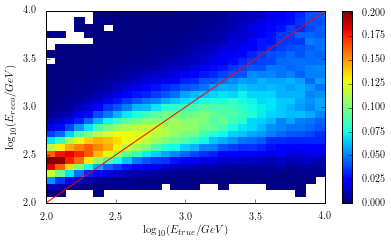

In [11]:

H, xedges, yedges = np.histogram2d([i for i in plot_data[1]],
                                   [i for i in plot_data[0]], 
                                   bins=(xbins, ybins))
H=np.array([np.array(i)/np.sum(i) for i in H])
H = H.T  # Let each row list bins with common y range.
fig, ax = newfig(0.9)
X, Y = np.meshgrid(xedges, yedges)
ax.plot(xbins,
        ybins,
        color='red')

H= np.ma.array(H)
H.mask = H == 0
cbar = ax.pcolormesh(X, Y, H)
plt.colorbar(cbar)
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
plt.savefig('lowE.png', dpi=300)
plt.show()



In [7]:
plt.semilogy(epoche, loss, color = 'blue', label = 'training loss')
plt.semilogy(epoche, val_loss, color = 'red', label = 'validation loss')
plt.legend(loc = 'best')
plt.show()

NameError: name 'epoche' is not defined

# IceCube MuEx Reco

In [15]:
infiles = ['11029_00000-00999.h5','11029_01000-01999.h5','11029_02000-02999.h5','11029_03000-03999.h5']
xbins = np.linspace(2,7,30)
ybins = np.linspace(2,7,30)

In [16]:
H = np.zeros((29,29))
for infile in infiles:
    data = h5py.File('./training_data/{}'.format(infile))
    H_temp, _, _ = np.histogram2d(np.concatenate(np.log10(data['reco_vals'][:,0:1])), 
                                       np.concatenate(np.log10(data['reco_vals'][:,3:4])),
                                       bins=(xbins, ybins))
    H += H_temp
    

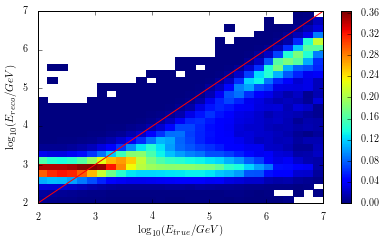

In [17]:
H=np.array([np.array(i)/np.sum(i) for i in H])
H = H.T  # Let each row list bins with common y range.
fig, ax = newfig(0.9)
X, Y = np.meshgrid(xbins, ybins)
ax.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
H= np.ma.array(H)
H.mask = H == 0
X, Y = np.meshgrid(xbins, ybins)
cbar = ax.pcolormesh(X, Y, H)
plt.colorbar(cbar)
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
plt.savefig('muex.png')
plt.show()